<a href="https://colab.research.google.com/github/Haridharan05/Basic-Project-DS/blob/main/Weghit_Predict_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/content/500 person data.csv")
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [3]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [4]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [5]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [ ]:
bins = (-1,0,1,2,3,4,5)
health = ['malnourished','underweight','fit','slightly overwight','overwight','extremly overwight']
data['Index'] = pd.cut(data['Index'],bins = bins , labels = health)


In [19]:
data['Index']
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


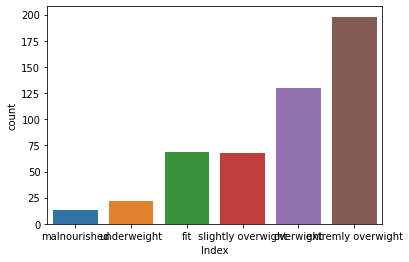

In [21]:
sns.countplot(data["Index"])

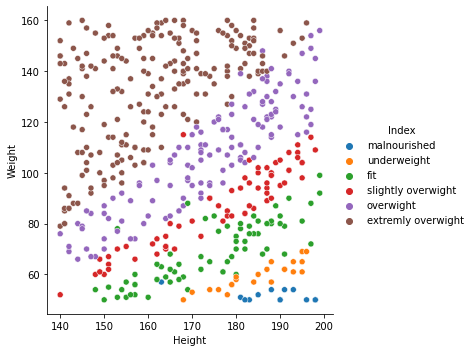

In [23]:
sns.relplot(x='Height',y='Weight',hue='Index',data=data)

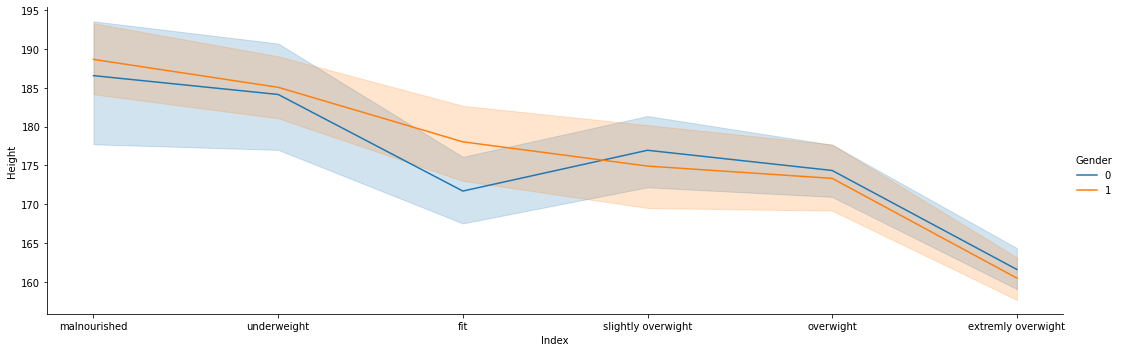

In [32]:
sns.relplot(x='Index',y='Height',hue='Gender',kind='line',data=data,height = 5 , aspect = 3)

In [33]:
X = data.drop('Index',axis=1)
Y = data['Index']

In [35]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 0)

In [36]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [37]:
clf = svm.SVC()
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)

In [40]:
print(classification_report(Y_test,pred))

                    precision    recall  f1-score   support

extremly overwight       0.88      0.97      0.92        36
               fit       0.73      0.80      0.76        10
      malnourished       0.00      0.00      0.00         3
         overwight       0.96      0.78      0.86        32
slightly overwight       0.78      0.93      0.85        15
       underweight       0.60      0.75      0.67         4

          accuracy                           0.85       100
         macro avg       0.66      0.71      0.68       100
      weighted avg       0.84      0.85      0.84       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print(confusion_matrix(Y_test,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [42]:
print(accuracy_score(Y_test,pred))

0.85


In [47]:
a = [[0,185,110]]
a = s.transform(a)
b = clf.predict(a)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [49]:
b

array(['overwight'], dtype=object)